In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,ConfusionMatrixDisplay,precision_recall_curve,roc_curve,make_scorer,accuracy_score
#plot_confusion_matrix-->ConfusionMatrixDisplay methods: .from_estimator or .from_predictions

# Code to ignore warnings from function usage
import warnings;
warnings.filterwarnings('ignore')

In [2]:
# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

In [3]:
#submission = pd.read_csv("test.csv")

In [7]:
data = pd.read_csv("data_all_dummies_DropFirstFalse.csv")

In [8]:
data.head()

,Unnamed: 0,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort_Acceptable,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Green Car,Seat_Class_Ordinary,Arrival_Time_Convenient_Acceptable,Arrival_Time_Convenient_Excellent,Arrival_Time_Convenient_Extremely Poor,Arrival_Time_Convenient_Good,Arrival_Time_Convenient_Needs Improvement,Arrival_Time_Convenient_Poor,Catering_Acceptable,Catering_Excellent,Catering_Extremely Poor,Catering_Good,Catering_Needs Improvement,Catering_Poor,Platform_Location_Convenient,Platform_Location_Inconvenient,Platform_Location_Manageable,Platform_Location_Needs Improvement,Platform_Location_Very Convenient,Platform_Location_Very Inconvenient,Onboard_Wifi_Service_Acceptable,Onboard_Wifi_Service_Excellent,Onboard_Wifi_Service_Extremely Poor,Onboard_Wifi_Service_Good,Onboard_Wifi_Service_Needs Improvement,Onboard_Wifi_Service_Poor,Onboard_Entertainment_Acceptable,Onboard_Entertainment_Excellent,Onboard_Entertainment_Extremely Poor,Onboard_Entertainment_Good,Onboard_Entertainment_Needs Improvement,Onboard_Entertainment_Poor,Online_Support_Acceptable,Online_Support_Excellent,Online_Support_Extremely Poor,Online_Support_Good,Online_Support_Needs Improvement,Online_Support_Poor,Ease_of_Online_Booking_Acceptable,Ease_of_Online_Booking_Excellent,Ease_of_Online_Booking_Extremely Poor,Ease_of_Online_Booking_Good,Ease_of_Online_Booking_Needs Improvement,Ease_of_Online_Booking_Poor,Onboard_Service_Acceptable,Onboard_Service_Excellent,Onboard_Service_Extremely Poor,Onboard_Service_Good,Onboard_Service_Needs Improvement,Onboard_Service_Poor,Legroom_Acceptable,Legroom_Excellent,Legroom_Extremely Poor,Legroom_Good,Legroom_Needs Improvement,Legroom_Poor,Baggage_Handling_Acceptable,Baggage_Handling_Excellent,Baggage_Handling_Good,Baggage_Handling_Needs Improvement,Baggage_Handling_Poor,CheckIn_Service_Acceptable,CheckIn_Service_Excellent,CheckIn_Service_Extremely Poor,CheckIn_Service_Good,CheckIn_Service_Needs Improvement,CheckIn_Service_Poor,Cleanliness_Acceptable,Cleanliness_Excellent,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,0,0,52.0,272.0,0.0,5.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0
1,1,0,48.0,2200.0,9.0,0.0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1
2,2,1,43.0,1061.0,77.0,119.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0
3,3,0,44.0,780.0,13.0,18.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0
4,4,1,50.0,1981.0,0.0,0.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0


In [9]:
data.tail()

,Unnamed: 0,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort_Acceptable,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Green Car,Seat_Class_Ordinary,Arrival_Time_Convenient_Acceptable,Arrival_Time_Convenient_Excellent,Arrival_Time_Convenient_Extremely Poor,Arrival_Time_Convenient_Good,Arrival_Time_Convenient_Needs Improvement,Arrival_Time_Convenient_Poor,Catering_Acceptable,Catering_Excellent,Catering_Extremely Poor,Catering_Good,Catering_Needs Improvement,Catering_Poor,Platform_Location_Convenient,Platform_Location_Inconvenient,Platform_Location_Manageable,Platform_Location_Needs Improvement,Platform_Location_Very Convenient,Platform_Location_Very Inconvenient,Onboard_Wifi_Service_Acceptable,Onboard_Wifi_Service_Excellent,Onboard_Wifi_Service_Extremely Poor,Onboard_Wifi_Service_Good,Onboard_Wifi_Service_Needs Improvement,Onboard_Wifi_Service_Poor,Onboard_Entertainment_Acceptable,Onboard_Entertainment_Excellent,Onboard_Entertainment_Extremely Poor,Onboard_Entertainment_Good,Onboard_Entertainment_Needs Improvement,Onboard_Entertainment_Poor,Online_Support_Acceptable,Online_Support_Excellent,Online_Support_Extremely Poor,Online_Support_Good,Online_Support_Needs Improvement,Online_Support_Poor,Ease_of_Online_Booking_Acceptable,Ease_of_Online_Booking_Excellent,Ease_of_Online_Booking_Extremely Poor,Ease_of_Online_Booking_Good,Ease_of_Online_Booking_Needs Improvement,Ease_of_Online_Booking_Poor,Onboard_Service_Acceptable,Onboard_Service_Excellent,Onboard_Service_Extremely Poor,Onboard_Service_Good,Onboard_Service_Needs Improvement,Onboard_Service_Poor,Legroom_Acceptable,Legroom_Excellent,Legroom_Extremely Poor,Legroom_Good,Legroom_Needs Improvement,Legroom_Poor,Baggage_Handling_Acceptable,Baggage_Handling_Excellent,Baggage_Handling_Good,Baggage_Handling_Needs Improvement,Baggage_Handling_Poor,CheckIn_Service_Acceptable,CheckIn_Service_Excellent,CheckIn_Service_Extremely Poor,CheckIn_Service_Good,CheckIn_Service_Needs Improvement,CheckIn_Service_Poor,Cleanliness_Acceptable,Cleanliness_Excellent,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
94374,94374,0,32.0,1357.0,83.0,125.0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0
94375,94375,1,44.0,592.0,5.0,11.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0
94376,94376,1,63.0,2794.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0
94377,94377,0,16.0,2744.0,0.0,0.0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1
94378,94378,0,54.0,2107.0,28.0,28.0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1


In [10]:
data.columns

Index(['Unnamed: 0', 'Overall_Experience', 'Age', 'Travel_Distance',
       'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Seat_Comfort_Acceptable', 'Seat_Comfort_Excellent',
       'Seat_Comfort_Extremely Poor', 'Seat_Comfort_Good',
       'Seat_Comfort_Needs Improvement', 'Seat_Comfort_Poor',
       'Seat_Class_Green Car', 'Seat_Class_Ordinary',
       'Arrival_Time_Convenient_Acceptable',
       'Arrival_Time_Convenient_Excellent',
       'Arrival_Time_Convenient_Extremely Poor',
       'Arrival_Time_Convenient_Good',
       'Arrival_Time_Convenient_Needs Improvement',
       'Arrival_Time_Convenient_Poor', 'Catering_Acceptable',
       'Catering_Excellent', 'Catering_Extremely Poor', 'Catering_Good',
       'Catering_Needs Improvement', 'Catering_Poor',
       'Platform_Location_Convenient', 'Platform_Location_Inconvenient',
       'Platform_Location_Manageable', 'Platform_Location_Needs Improvement',
       'Platform_Location_Very Convenient',
       'Platform_Locatio

In [11]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [12]:
data

,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort_Acceptable,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Green Car,Seat_Class_Ordinary,Arrival_Time_Convenient_Acceptable,Arrival_Time_Convenient_Excellent,Arrival_Time_Convenient_Extremely Poor,Arrival_Time_Convenient_Good,Arrival_Time_Convenient_Needs Improvement,Arrival_Time_Convenient_Poor,Catering_Acceptable,Catering_Excellent,Catering_Extremely Poor,Catering_Good,Catering_Needs Improvement,Catering_Poor,Platform_Location_Convenient,Platform_Location_Inconvenient,Platform_Location_Manageable,Platform_Location_Needs Improvement,Platform_Location_Very Convenient,Platform_Location_Very Inconvenient,Onboard_Wifi_Service_Acceptable,Onboard_Wifi_Service_Excellent,Onboard_Wifi_Service_Extremely Poor,Onboard_Wifi_Service_Good,Onboard_Wifi_Service_Needs Improvement,Onboard_Wifi_Service_Poor,Onboard_Entertainment_Acceptable,Onboard_Entertainment_Excellent,Onboard_Entertainment_Extremely Poor,Onboard_Entertainment_Good,Onboard_Entertainment_Needs Improvement,Onboard_Entertainment_Poor,Online_Support_Acceptable,Online_Support_Excellent,Online_Support_Extremely Poor,Online_Support_Good,Online_Support_Needs Improvement,Online_Support_Poor,Ease_of_Online_Booking_Acceptable,Ease_of_Online_Booking_Excellent,Ease_of_Online_Booking_Extremely Poor,Ease_of_Online_Booking_Good,Ease_of_Online_Booking_Needs Improvement,Ease_of_Online_Booking_Poor,Onboard_Service_Acceptable,Onboard_Service_Excellent,Onboard_Service_Extremely Poor,Onboard_Service_Good,Onboard_Service_Needs Improvement,Onboard_Service_Poor,Legroom_Acceptable,Legroom_Excellent,Legroom_Extremely Poor,Legroom_Good,Legroom_Needs Improvement,Legroom_Poor,Baggage_Handling_Acceptable,Baggage_Handling_Excellent,Baggage_Handling_Good,Baggage_Handling_Needs Improvement,Baggage_Handling_Poor,CheckIn_Service_Acceptable,CheckIn_Service_Excellent,CheckIn_Service_Extremely Poor,CheckIn_Service_Good,CheckIn_Service_Needs Improvement,CheckIn_Service_Poor,Cleanliness_Acceptable,Cleanliness_Excellent,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
0,0,52.0,272.0,0.0,5.0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0
1,0,48.0,2200.0,9.0,0.0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1
2,1,43.0,1061.0,77.0,119.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0
3,0,44.0,780.0,13.0,18.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0
4,1,50.0,1981.0,0.0,0.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 98 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Overall_Experience                         94379 non-null  int64  
 1   Age                                        94379 non-null  float64
 2   Travel_Distance                            94379 non-null  float64
 3   Departure_Delay_in_Mins                    94379 non-null  float64
 4   Arrival_Delay_in_Mins                      94379 non-null  float64
 5   Seat_Comfort_Acceptable                    94379 non-null  int64  
 6   Seat_Comfort_Excellent                     94379 non-null  int64  
 7   Seat_Comfort_Extremely Poor                94379 non-null  int64  
 8   Seat_Comfort_Good                          94379 non-null  int64  
 9   Seat_Comfort_Needs Improvement             94379 non-null  int64  
 10  Seat_Comfort_Poor     

In [14]:
data.describe()

,Overall_Experience,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort_Acceptable,Seat_Comfort_Excellent,Seat_Comfort_Extremely Poor,Seat_Comfort_Good,Seat_Comfort_Needs Improvement,Seat_Comfort_Poor,Seat_Class_Green Car,Seat_Class_Ordinary,Arrival_Time_Convenient_Acceptable,Arrival_Time_Convenient_Excellent,Arrival_Time_Convenient_Extremely Poor,Arrival_Time_Convenient_Good,Arrival_Time_Convenient_Needs Improvement,Arrival_Time_Convenient_Poor,Catering_Acceptable,Catering_Excellent,Catering_Extremely Poor,Catering_Good,Catering_Needs Improvement,Catering_Poor,Platform_Location_Convenient,Platform_Location_Inconvenient,Platform_Location_Manageable,Platform_Location_Needs Improvement,Platform_Location_Very Convenient,Platform_Location_Very Inconvenient,Onboard_Wifi_Service_Acceptable,Onboard_Wifi_Service_Excellent,Onboard_Wifi_Service_Extremely Poor,Onboard_Wifi_Service_Good,Onboard_Wifi_Service_Needs Improvement,Onboard_Wifi_Service_Poor,Onboard_Entertainment_Acceptable,Onboard_Entertainment_Excellent,Onboard_Entertainment_Extremely Poor,Onboard_Entertainment_Good,Onboard_Entertainment_Needs Improvement,Onboard_Entertainment_Poor,Online_Support_Acceptable,Online_Support_Excellent,Online_Support_Extremely Poor,Online_Support_Good,Online_Support_Needs Improvement,Online_Support_Poor,Ease_of_Online_Booking_Acceptable,Ease_of_Online_Booking_Excellent,Ease_of_Online_Booking_Extremely Poor,Ease_of_Online_Booking_Good,Ease_of_Online_Booking_Needs Improvement,Ease_of_Online_Booking_Poor,Onboard_Service_Acceptable,Onboard_Service_Excellent,Onboard_Service_Extremely Poor,Onboard_Service_Good,Onboard_Service_Needs Improvement,Onboard_Service_Poor,Legroom_Acceptable,Legroom_Excellent,Legroom_Extremely Poor,Legroom_Good,Legroom_Needs Improvement,Legroom_Poor,Baggage_Handling_Acceptable,Baggage_Handling_Excellent,Baggage_Handling_Good,Baggage_Handling_Needs Improvement,Baggage_Handling_Poor,CheckIn_Service_Acceptable,CheckIn_Service_Excellent,CheckIn_Service_Extremely Poor,CheckIn_Service_Good,CheckIn_Service_Needs Improvement,CheckIn_Service_Poor,Cleanliness_Acceptable,Cleanliness_Excellent,Cleanliness_Extremely Poor,Cleanliness_Good,Cleanliness_Needs Improvement,Cleanliness_Poor,Online_Boarding_Acceptable,Online_Boarding_Excellent,Online_Boarding_Extremely Poor,Online_Boarding_Good,Online_Boarding_Needs Improvement,Online_Boarding_Poor,Gender_Female,Gender_Male,Customer_Type_Disloyal Customer,Customer_Type_Loyal Customer,Type_Travel_Business Travel,Type_Travel_Personal Travel,Travel_Class_Business,Travel_Class_Eco
count,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000,94379.000000
mean,0.546658,39.419850,1978.888185,14.638246,14.948463,0.224828,0.137435,0.036692,0.218216,0.221935,0.160894,0.502601,0.497399,0.160809,0.18737

In [15]:
X = data.drop(["Overall_Experience"], axis=1)
Y = data["Overall_Experience"]

In [16]:
# Splitting data in train and test sets and final validation
#X_seen, X_val, y_seen, y_val = train_test_split(X, Y, test_size=0.10,stratify=Y, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X_seen, y_seen, test_size=0.20,stratify=y_seen, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,stratify=Y, random_state=1)

In [17]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
#print("Shape of validation set : ", X_val.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
#print("Percentage of classes in validation set:")
#print(y_val.value_counts(normalize=True))

Shape of Training set :  (75503, 97)
Shape of test set :  (18876, 97)
Percentage of classes in training set:
1    0.546654
0    0.453346
Name: Overall_Experience, dtype: float64
Percentage of classes in test set:
1    0.546673
0    0.453327
Name: Overall_Experience, dtype: float64


In [18]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    print('Accuracy: ',(cm[0,0]+cm[1,1])/cm.sum())
    
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34229
           1       1.00      1.00      1.00     41274

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503

Accuracy:  1.0


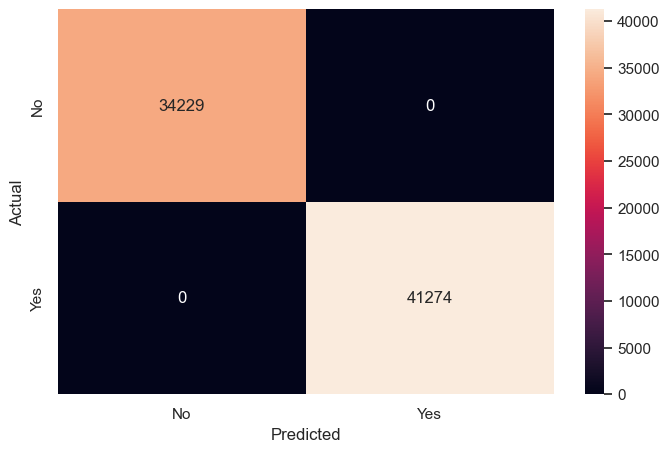

In [19]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train,pred_train_dt)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8557
           1       0.93      0.93      0.93     10319

    accuracy                           0.93     18876
   macro avg       0.93      0.93      0.93     18876
weighted avg       0.93      0.93      0.93     18876

Accuracy:  0.9277389277389277


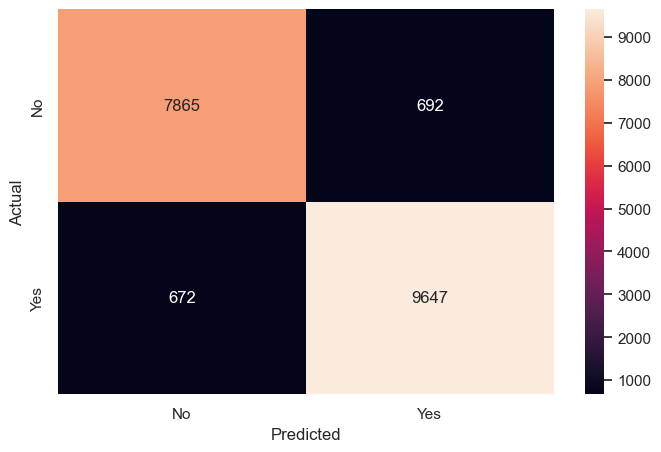

In [20]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test,pred_test_dt)

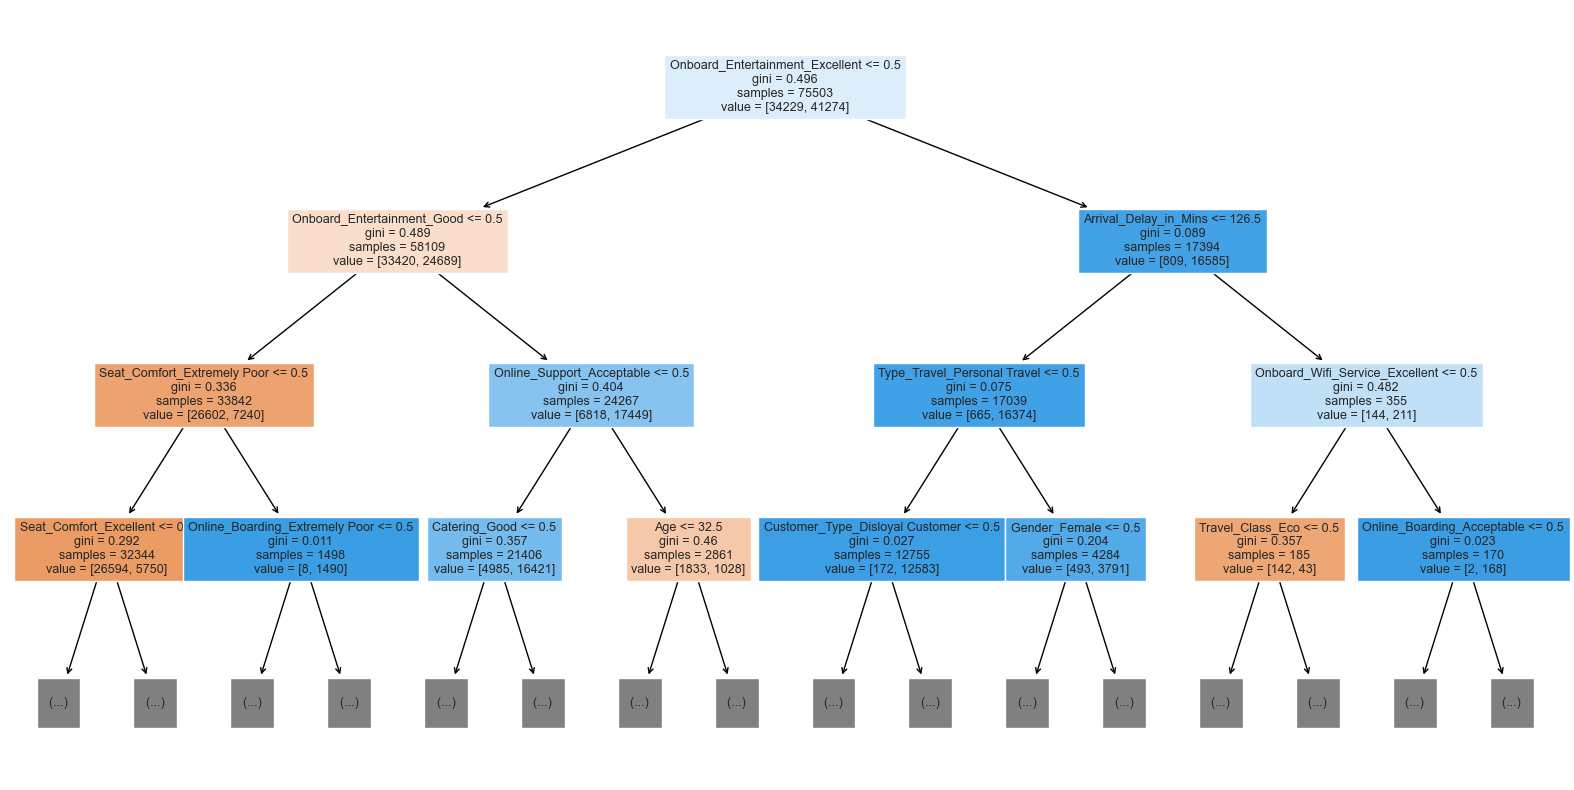

In [21]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model_dt,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

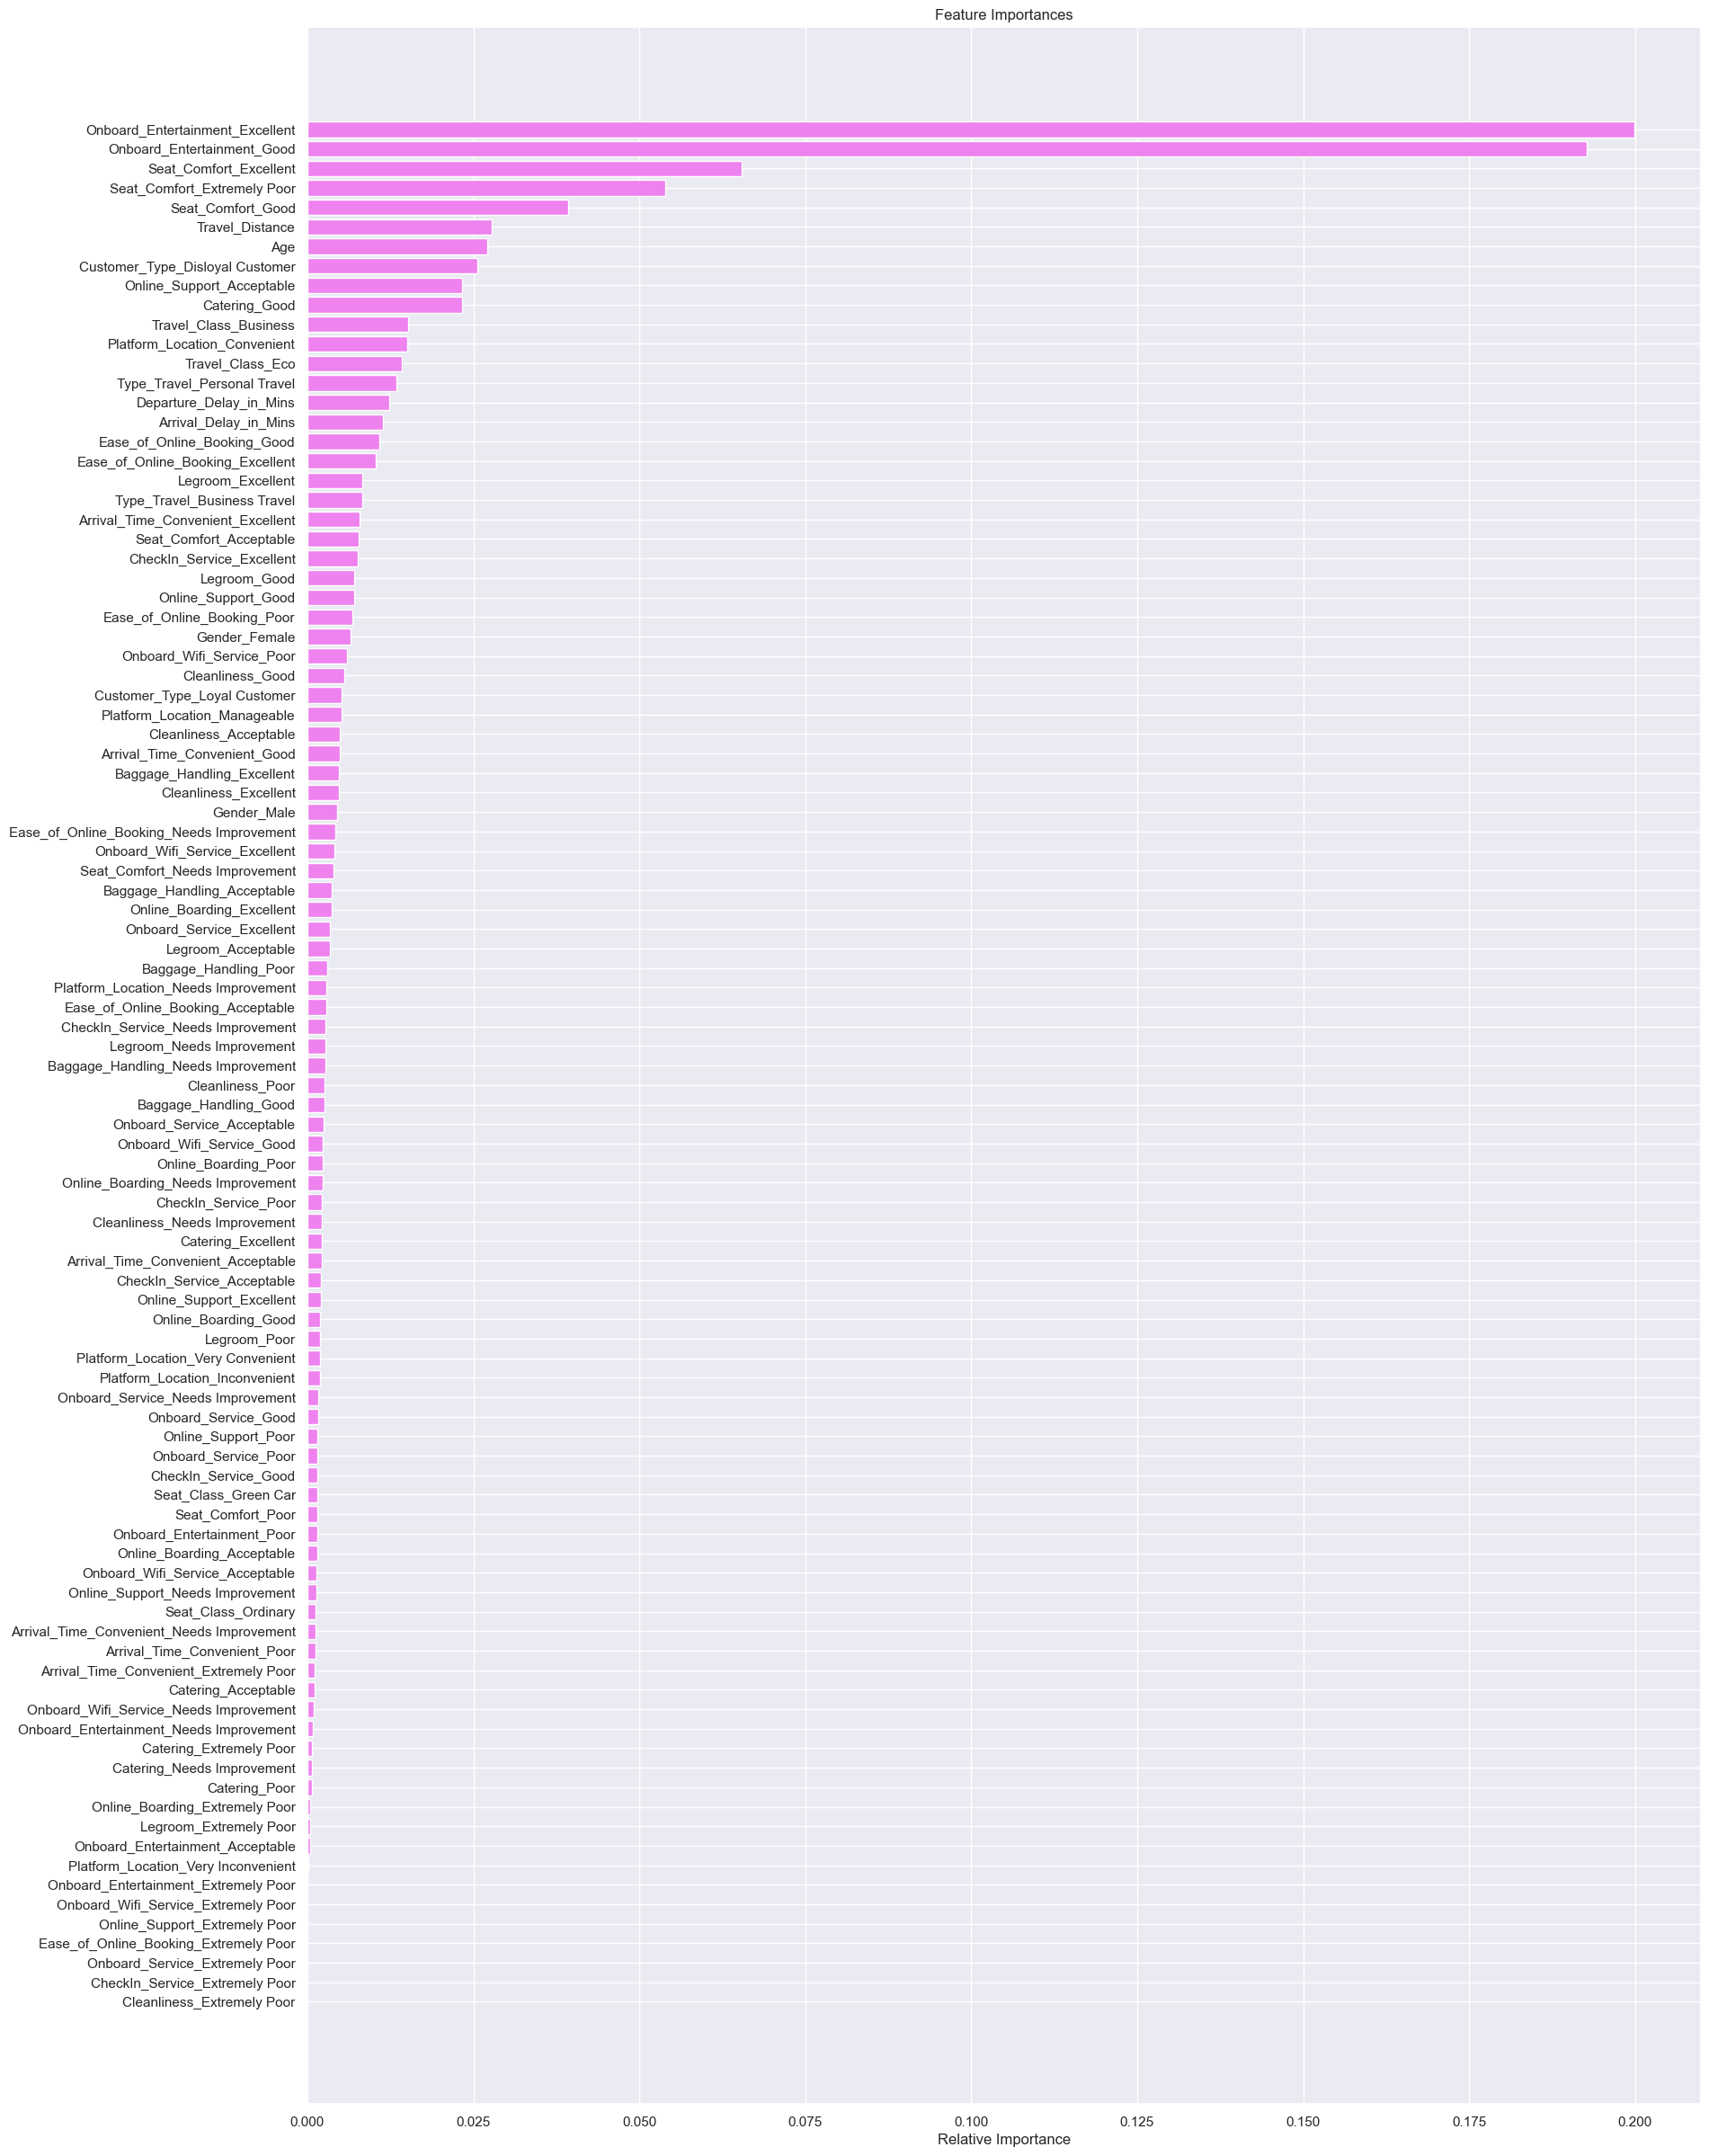

In [22]:
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 30))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [23]:
# Choose the type of classifier.

estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(12,30,2),
    "max_leaf_nodes": [400, 500, 600],
    "min_samples_split": [1, 2, 3, 4, 6],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='f1',n_jobs=-1)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters

estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=18, max_leaf_nodes=500, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     34229
           1       0.97      0.95      0.96     41274

    accuracy                           0.95     75503
   macro avg       0.95      0.95      0.95     75503
weighted avg       0.95      0.95      0.95     75503

Accuracy:  0.9540283167556256


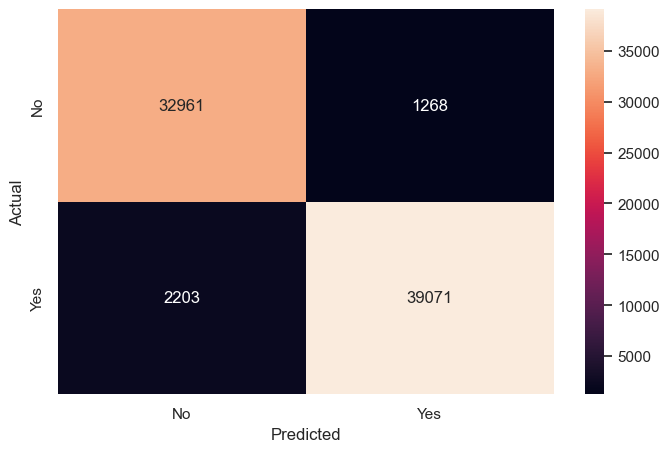

In [24]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8557
           1       0.95      0.93      0.94     10319

    accuracy                           0.94     18876
   macro avg       0.94      0.94      0.94     18876
weighted avg       0.94      0.94      0.94     18876

Accuracy:  0.9382284382284383


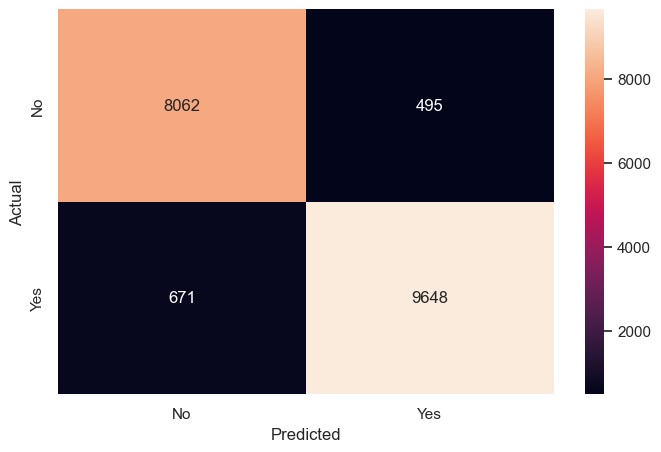

In [25]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

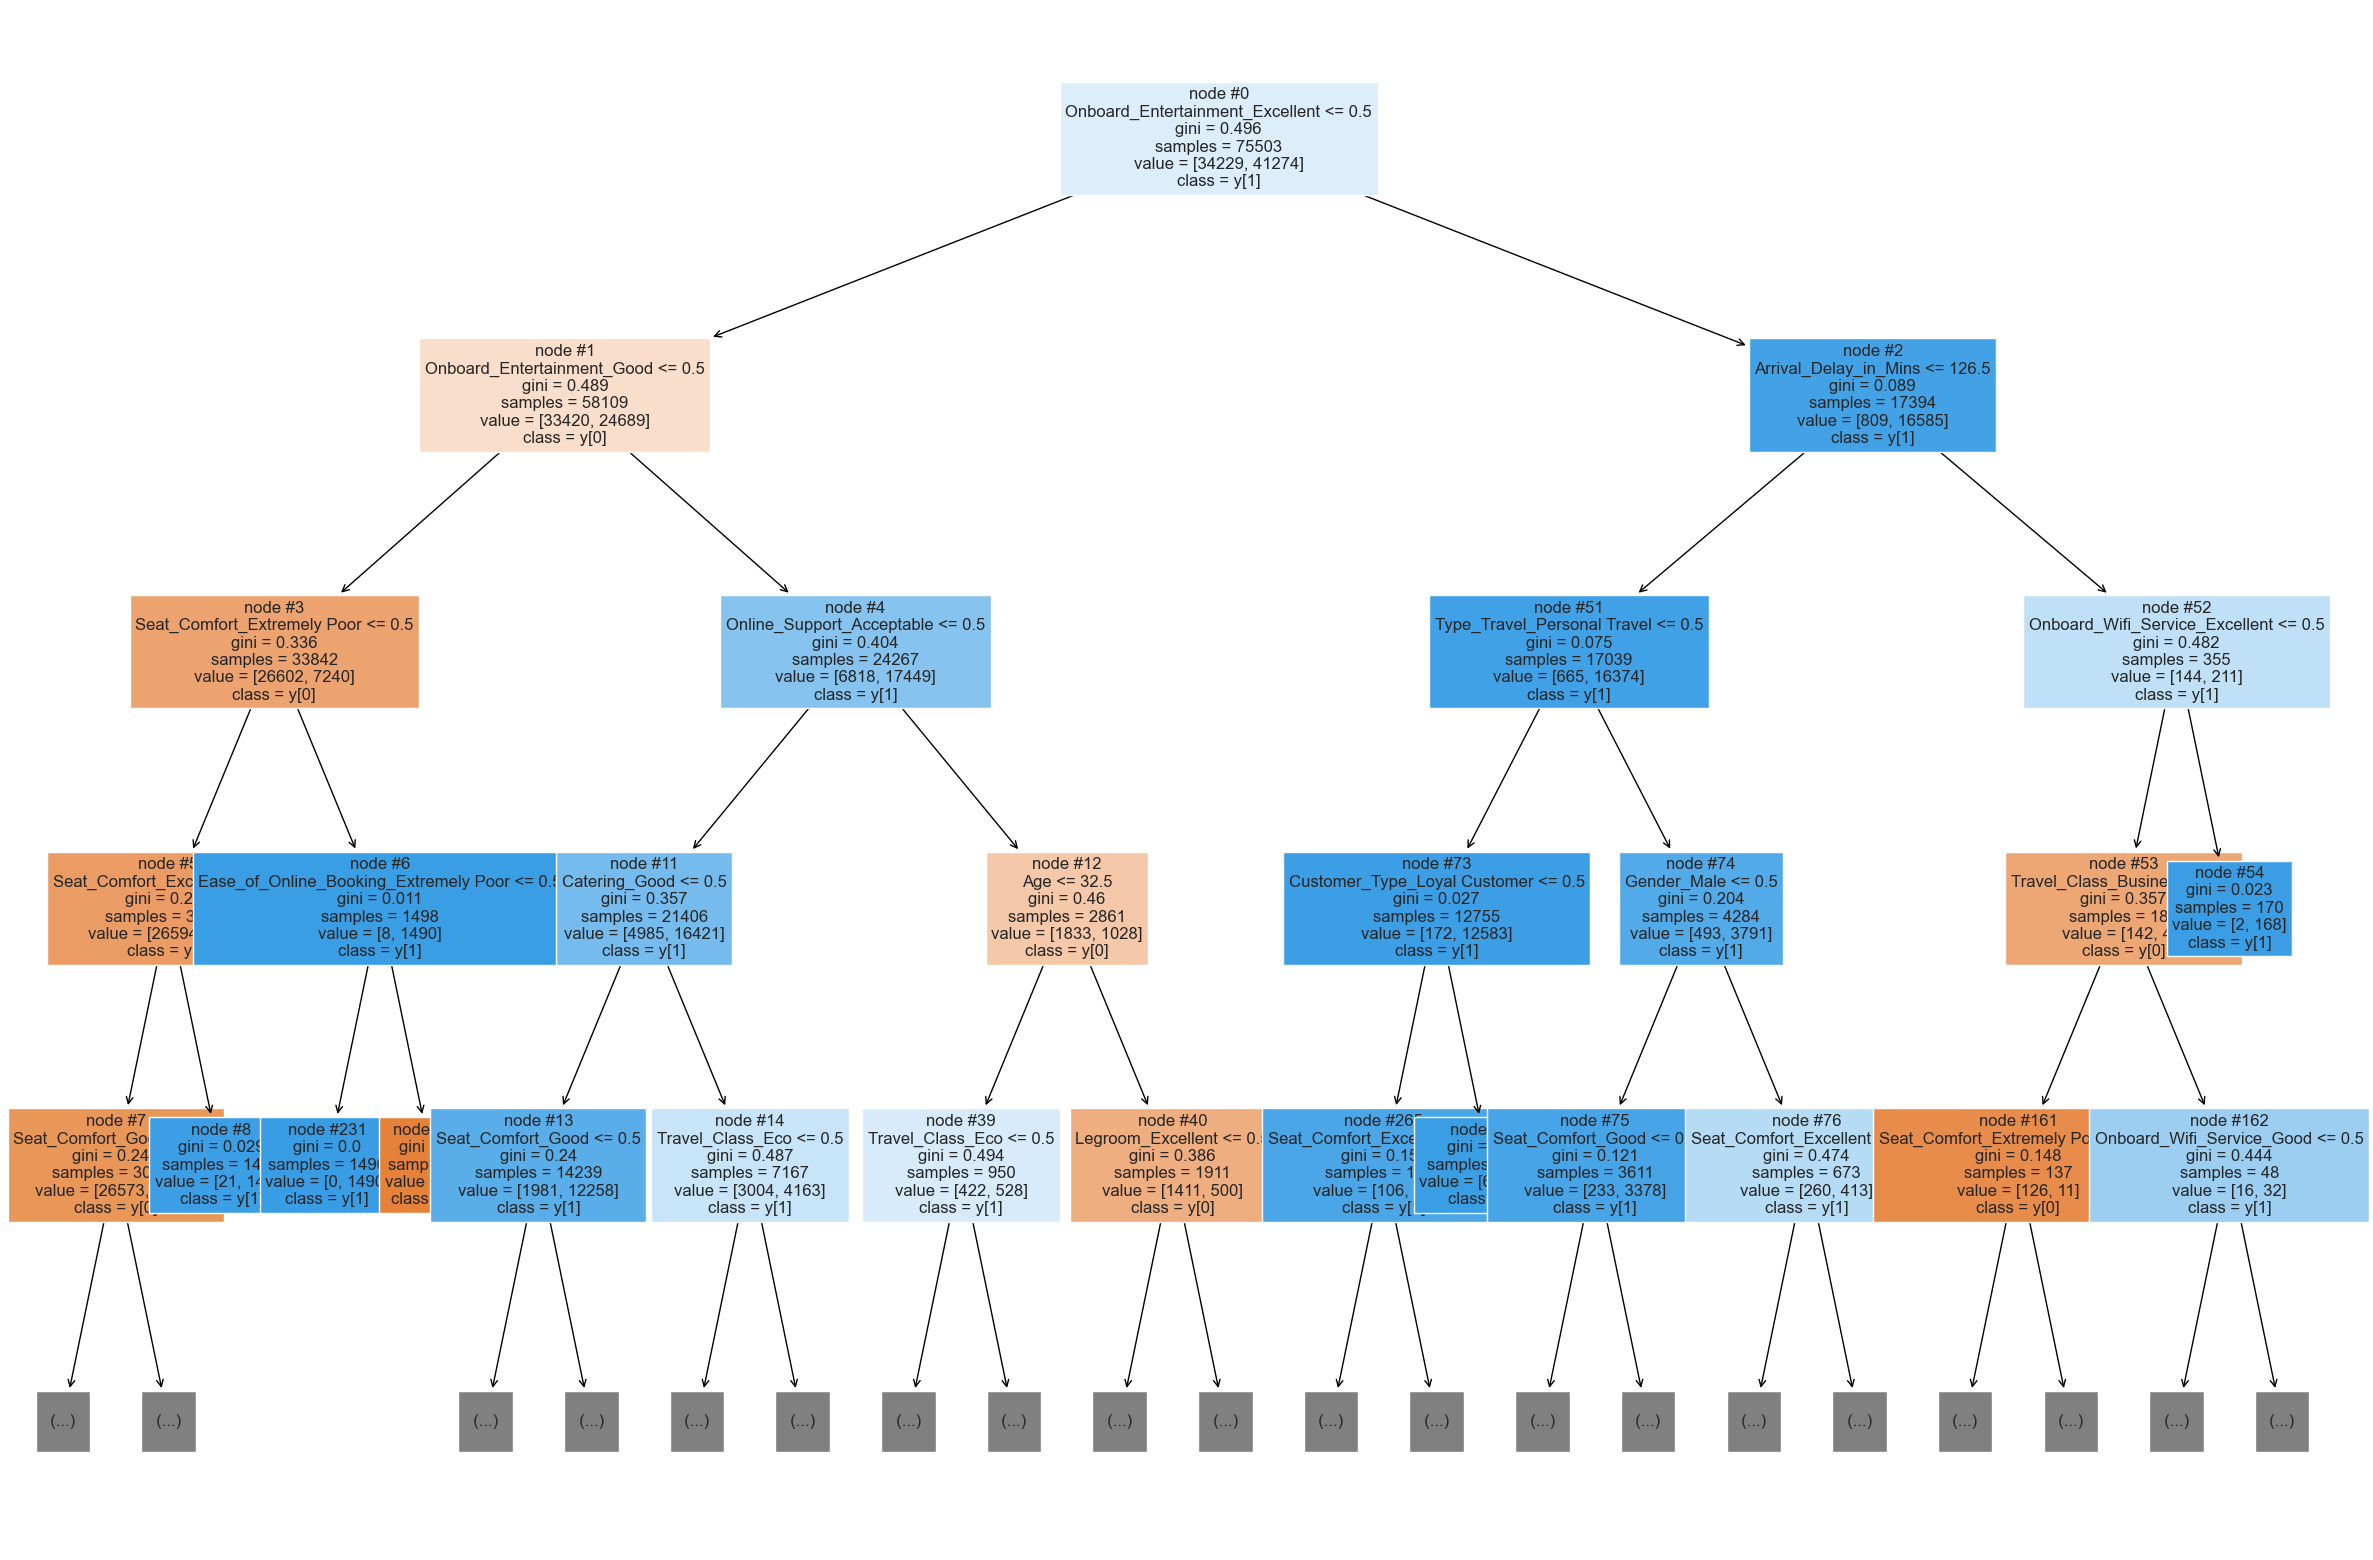

In [26]:
feature_names = list(X_train.columns)
plt.figure(figsize=(30, 20))
out = tree.plot_tree(
    estimator,max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=12,
    node_ids=True,
    class_names=True,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

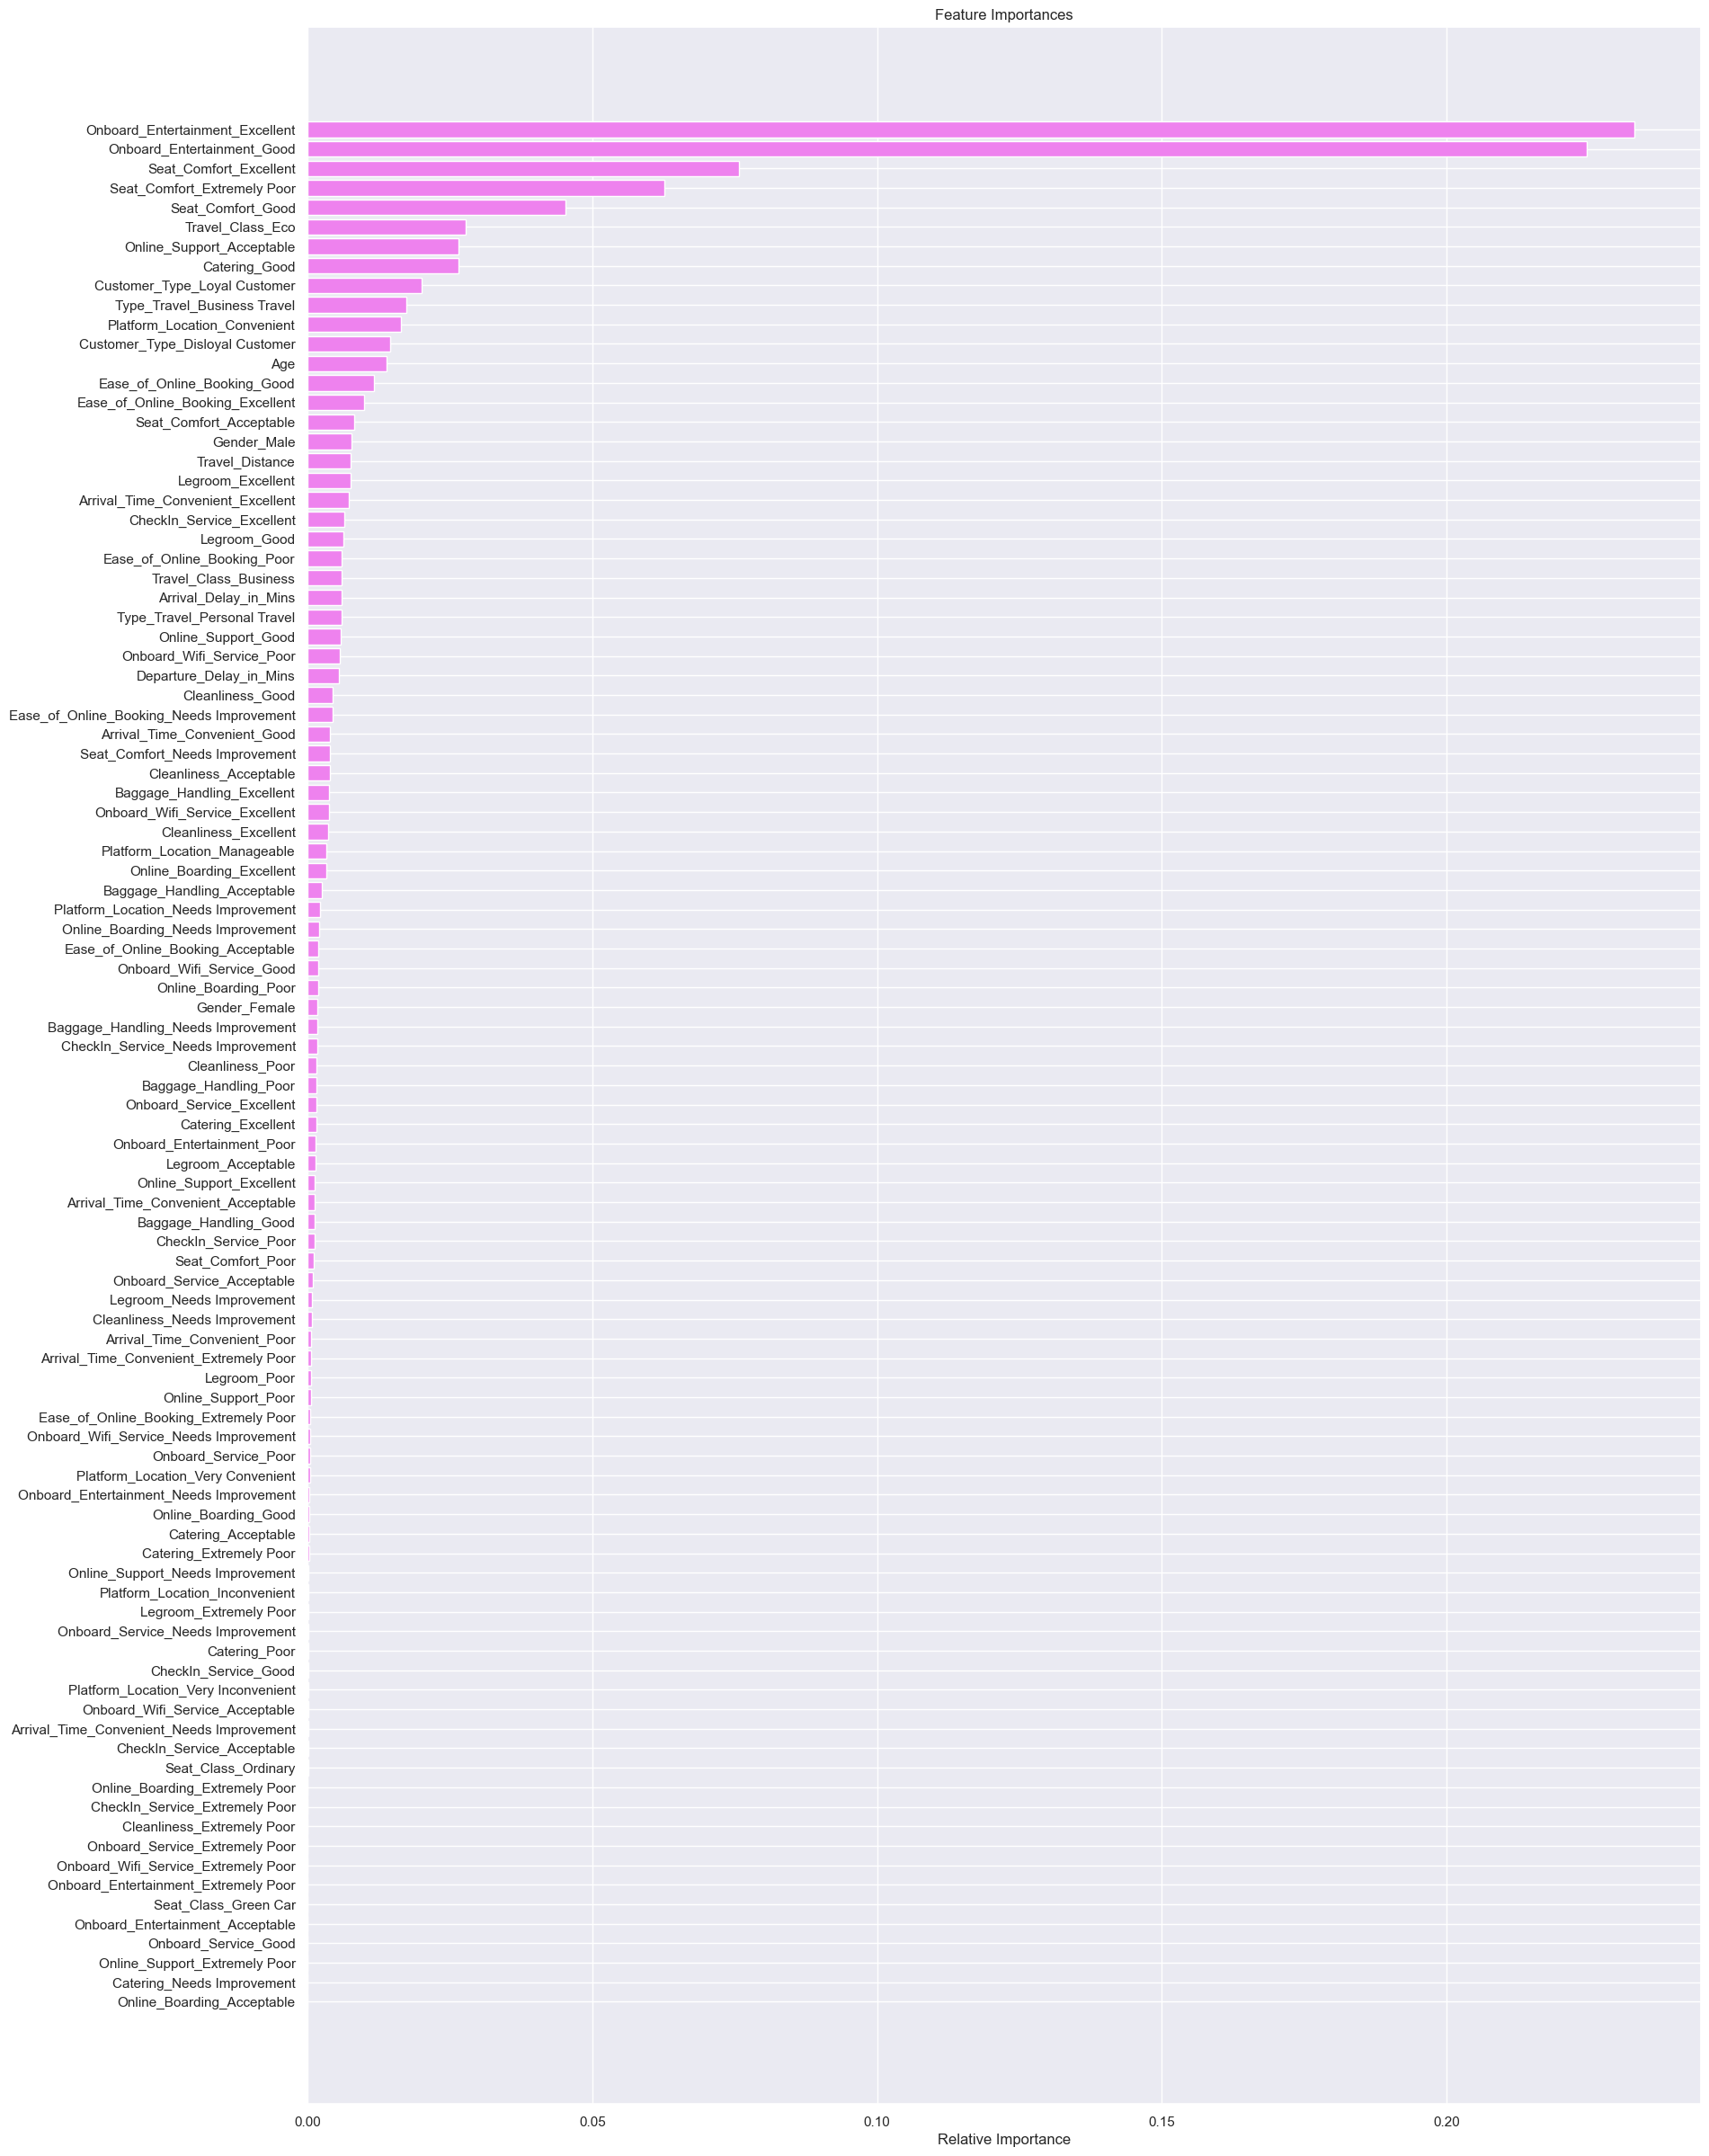

In [27]:
# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20, 30))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34229
           1       1.00      1.00      1.00     41274

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503

Accuracy:  1.0


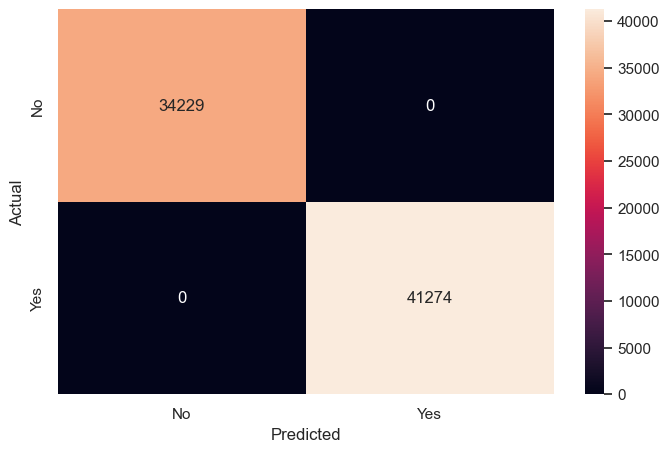

In [28]:
rf_estimator = RandomForestClassifier(class_weight = {0:0.453341, 1:0.546659}, random_state = 1)
rf_estimator.fit(X_train,y_train)
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train,y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8557
           1       0.96      0.95      0.95     10319

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876

Accuracy:  0.9496185632549269


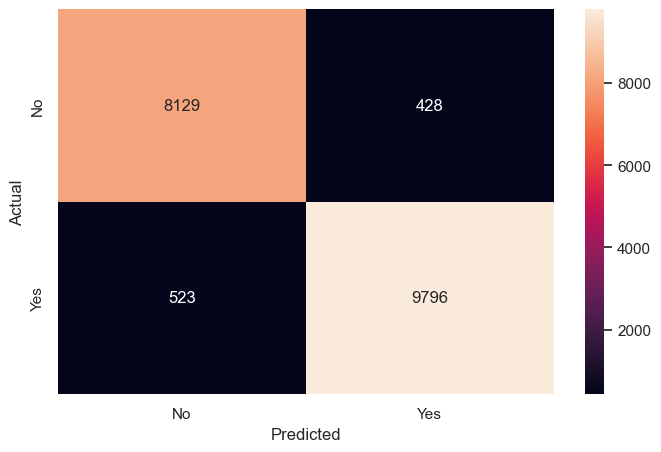

In [29]:
y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test,y_pred_test_rf)

In [30]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (20, 20))

sns.barplot(importance_df.Importance, importance_df.index)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 2000x2000 with 0 Axes>

In [28]:
#scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
#X_train_scaled = scaling.transform(X_train)
#X_test_scaled = scaling.transform(X_test)

In [39]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0:0.453341, 1:0.546659}, random_state = 1, n_jobs=-1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [600, 700, 800, 900],
        "min_samples_leaf": np.arange(1, 2, 1),
        "max_features": [0.35, 0.4, 0.45, 0.5],
}


# Type of scoring used to compare parameter combinations - accuracy score
scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [40]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.453341, 1: 0.546659},
                       max_features=0.35, n_estimators=700, n_jobs=-1,
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34229
           1       1.00      1.00      1.00     41274

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503

Accuracy:  1.0


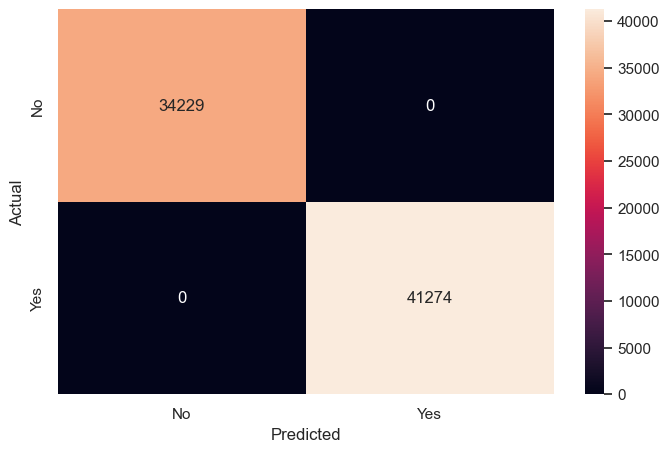

In [41]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8557
           1       0.96      0.95      0.96     10319

    accuracy                           0.95     18876
   macro avg       0.95      0.96      0.95     18876
weighted avg       0.95      0.95      0.95     18876

Accuracy:  0.9548633184996821


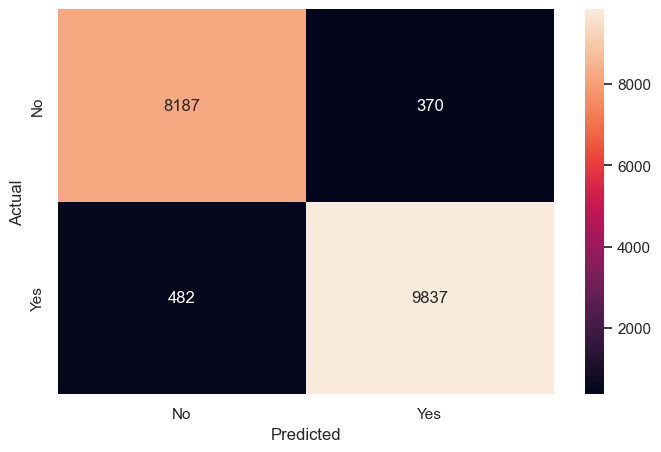

In [42]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

# train-test-split 0.3
# n_estimators=600, max_features=0.35: 0.953485908
# max_features=0.4, n_estimators=700 : 0.953450589

# train-test-split 0.2:
# max_features=0.35, n_estimators=700: 0.9548633184996821 > my best Hackathon score of 0.9548621 on April 10, 2023

# max_features=0.3,  n_estimators=500: 0.9548633184996821: see below: Result of RandomizedSearchCV (taking hours)

# perhaps slight further improvement using continuous distribution of max_features and more refined steps for n_estimators

<AxesSubplot:xlabel='Importance'>

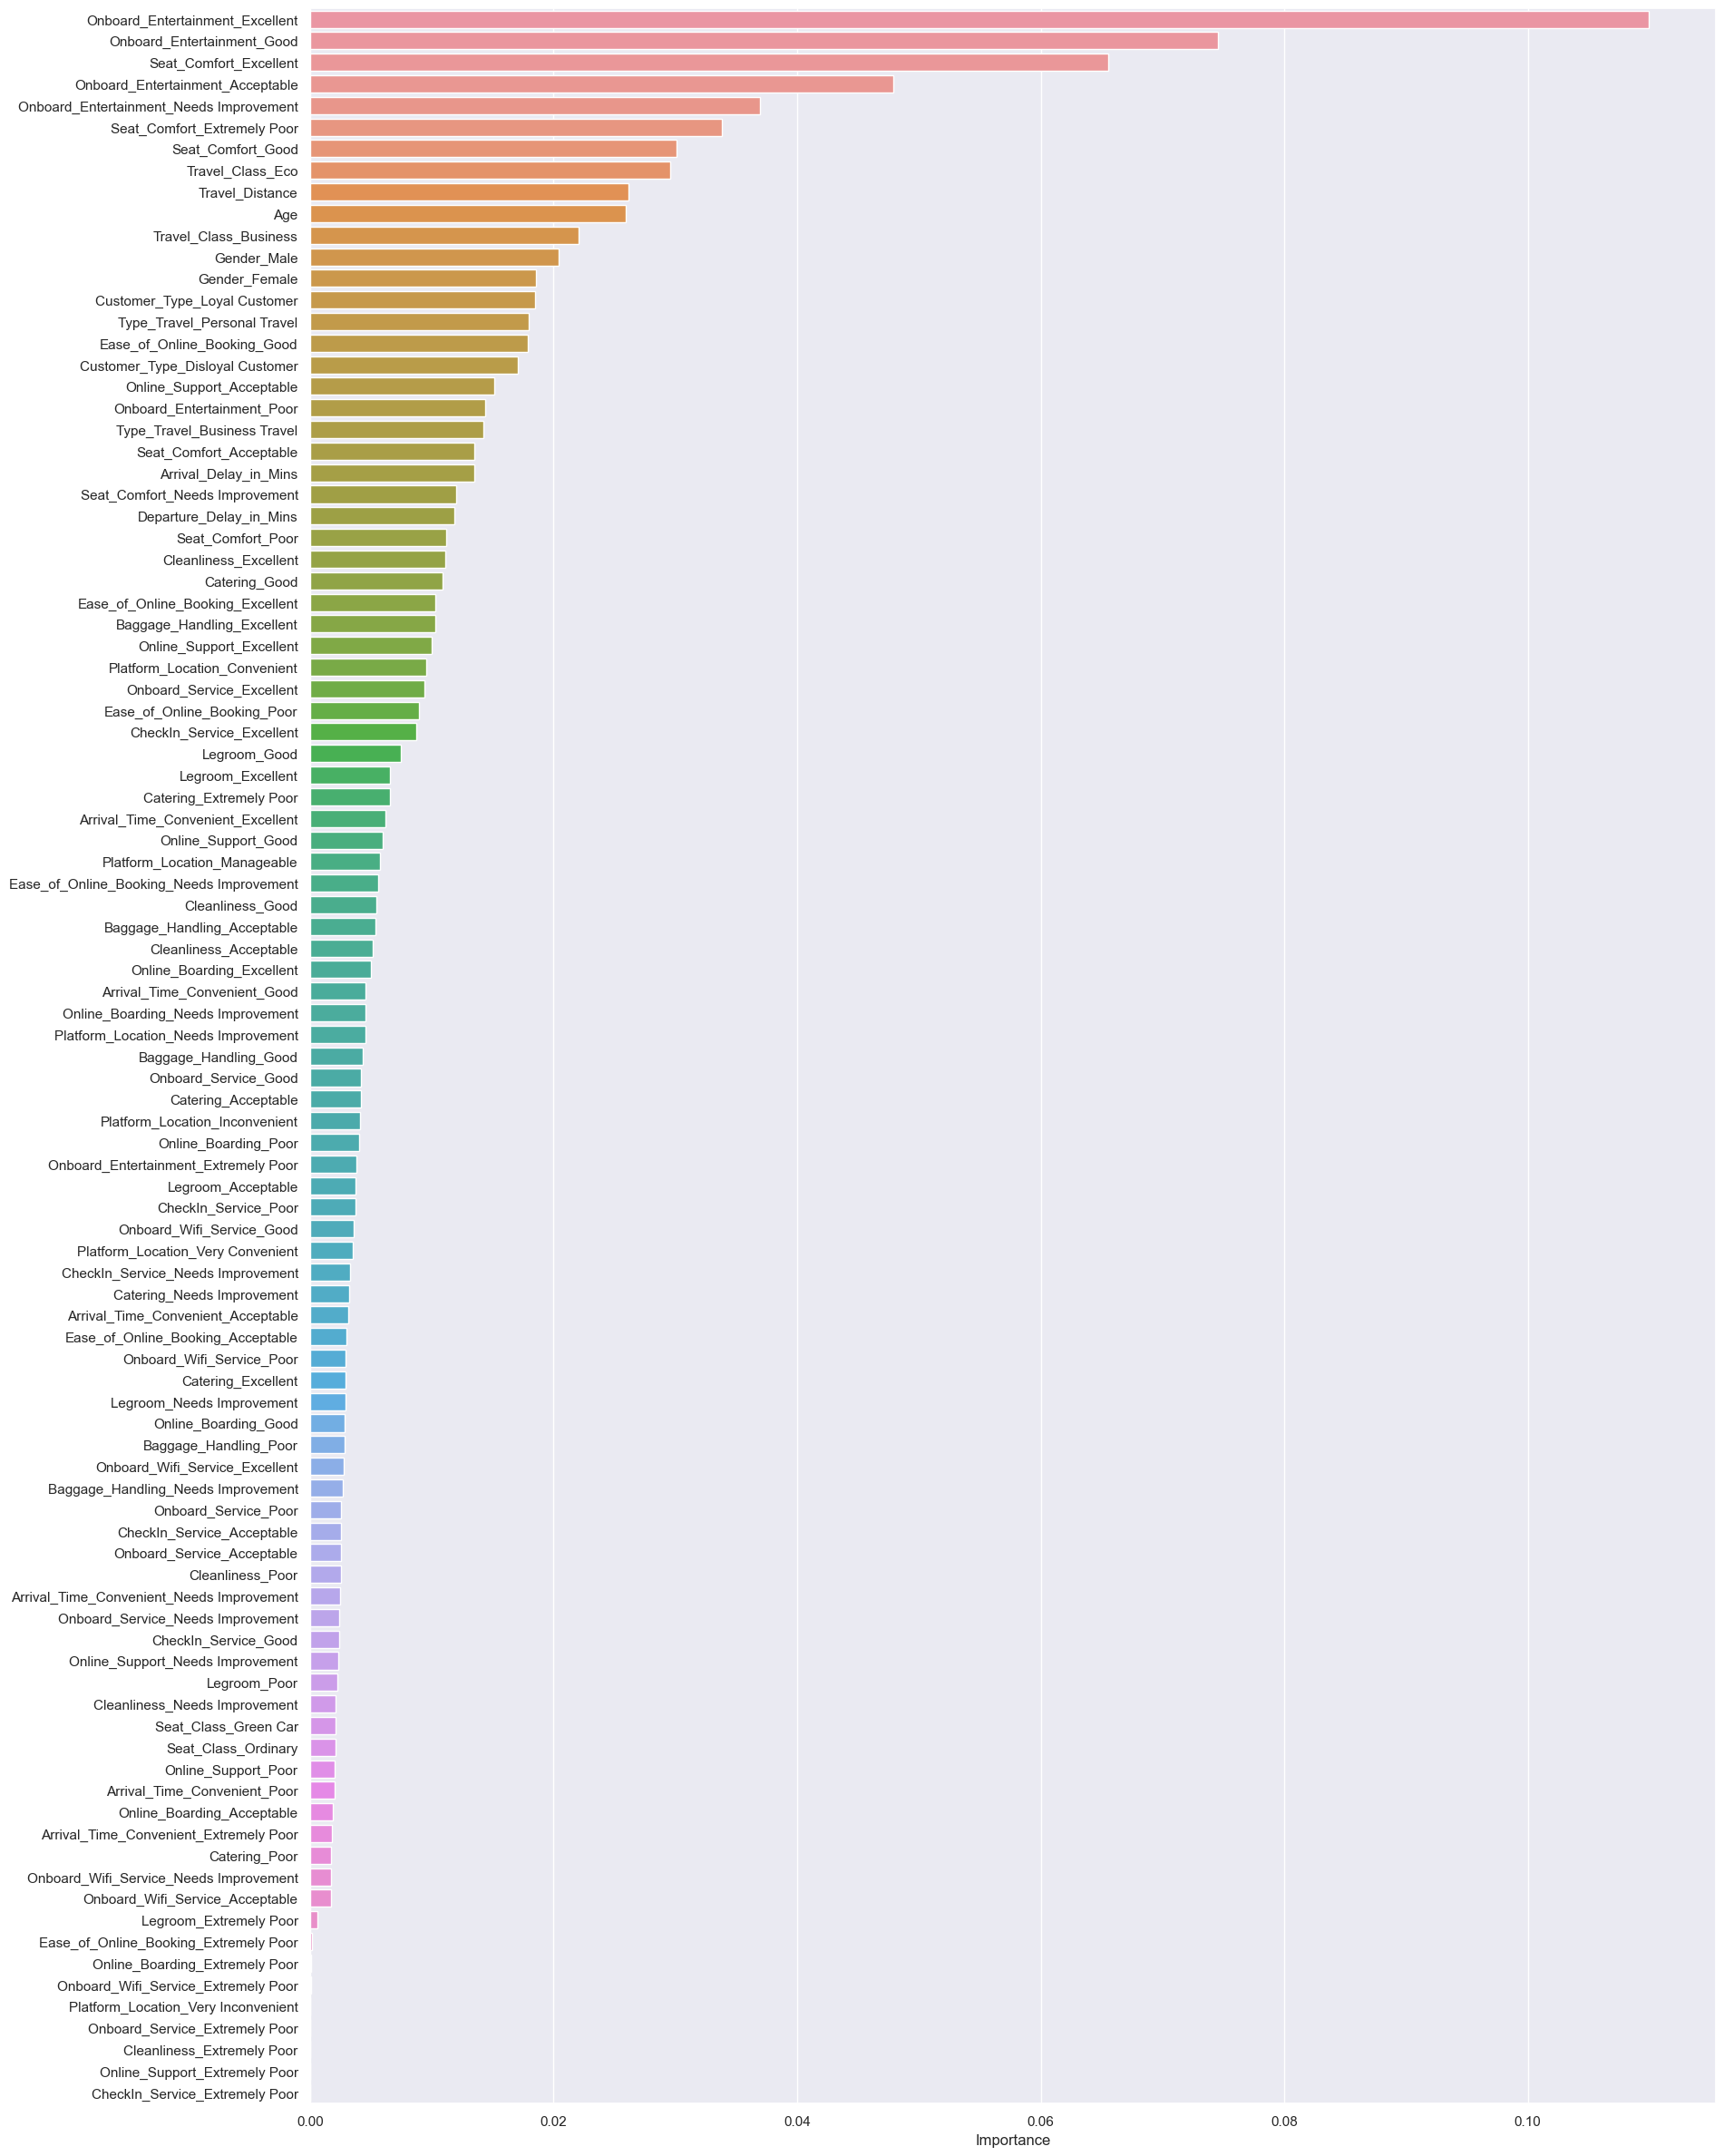

In [43]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (20, 30))

sns.barplot(importance_df.Importance, importance_df.index)

In [10]:
from sklearn.model_selection import RandomizedSearchCV


rf_estimator_tuned = RandomForestClassifier(class_weight = {0:0.453342, 1:0.546658}, random_state = 1, n_jobs=-1)

# Number of trees in random forest
n_estimators = [100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000,1050,1100,1150,1200]
# Number of features to consider at every split
max_features = [0.2,0.25,0.3,0.35,0.375,0.4,0.425,0.45,0.5,0.6,0.7,0.8,0.9]   #['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [10,15]
# Minimum number of samples required to split a node
#min_samples_split = [2, 4]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Grid of parameters to choose from
params_rf = {  'n_estimators': n_estimators,
               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap  }
print(params_rf)

# Type of scoring used to compare parameter combinations - accuracy score
scorer = make_scorer(accuracy_score)

rf_RandomGrid = RandomizedSearchCV(estimator = rf_estimator_tuned, n_iter=100, param_distributions = params_rf, cv = 5, verbose=2, n_jobs = -1)

# Set the classifier to the best combination of parameters
rf_RandomGrid = rf_RandomGrid.fit(X_train, y_train)

rf_estimator_tuned = rf_RandomGrid.best_estimator_

rf_RandomGrid.best_params_

{'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200], 'max_features': [0.2, 0.25, 0.3, 0.35, 0.375, 0.4, 0.425, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9], 'bootstrap': [True, False]}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 500, 'max_features': 0.3, 'bootstrap': False}

In [11]:
rf_estimator_tuned.fit(X_train, y_train)

[CV] END bootstrap=False, max_features=0.6, n_estimators=300; total time=13.9min
[CV] END bootstrap=False, max_features=0.6, n_estimators=500; total time=11.8min
[CV] END bootstrap=False, max_features=0.3, n_estimators=250; total time= 3.2min
[CV] END bootstrap=True, max_features=0.5, n_estimators=1150; total time=14.3min
[CV] END .bootstrap=True, max_features=0.7, n_estimators=350; total time= 5.9min
[CV] END bootstrap=False, max_features=0.4, n_estimators=150; total time= 2.4min
[CV] END bootstrap=False, max_features=0.6, n_estimators=1200; total time=27.4min
[CV] END bootstrap=False, max_features=0.4, n_estimators=350; total time= 5.5min
[CV] END bootstrap=True, max_features=0.35, n_estimators=550; total time= 5.1min
[CV] END bootstrap=False, max_features=0.35, n_estimators=250; total time= 3.5min
[CV] END .bootstrap=True, max_features=0.7, n_estimators=950; total time=15.9min
[CV] END .bootstrap=True, max_features=0.4, n_estimators=450; total time= 4.6min
[CV] END bootstrap=True, m

RandomForestClassifier(bootstrap=False, class_weight={0: 0.453342, 1: 0.546658},
                       max_features=0.3, n_estimators=500, n_jobs=-1,
                       random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34229
           1       1.00      1.00      1.00     41274

    accuracy                           1.00     75503
   macro avg       1.00      1.00      1.00     75503
weighted avg       1.00      1.00      1.00     75503

Accuracy:  1.0


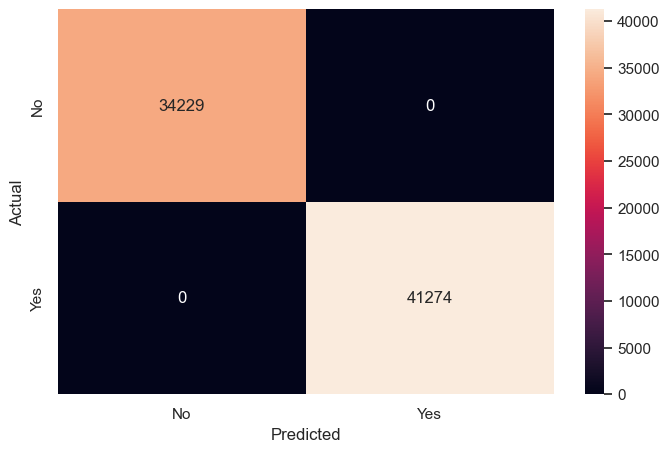

In [12]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      8557
           1       0.96      0.95      0.96     10319

    accuracy                           0.95     18876
   macro avg       0.95      0.95      0.95     18876
weighted avg       0.95      0.95      0.95     18876

Accuracy:  0.9548633184996821


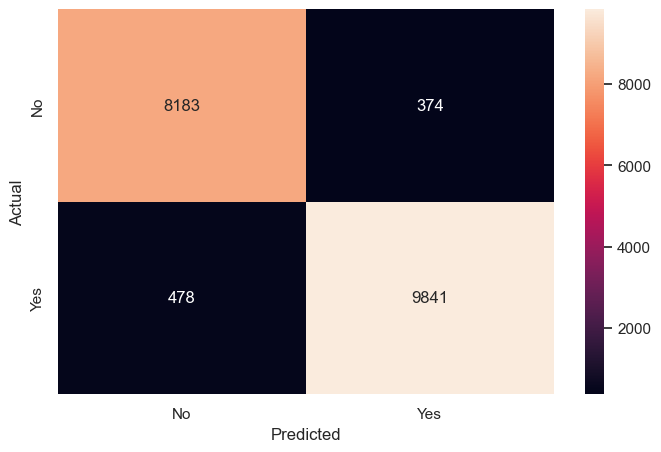

In [13]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

<AxesSubplot:xlabel='Importance'>

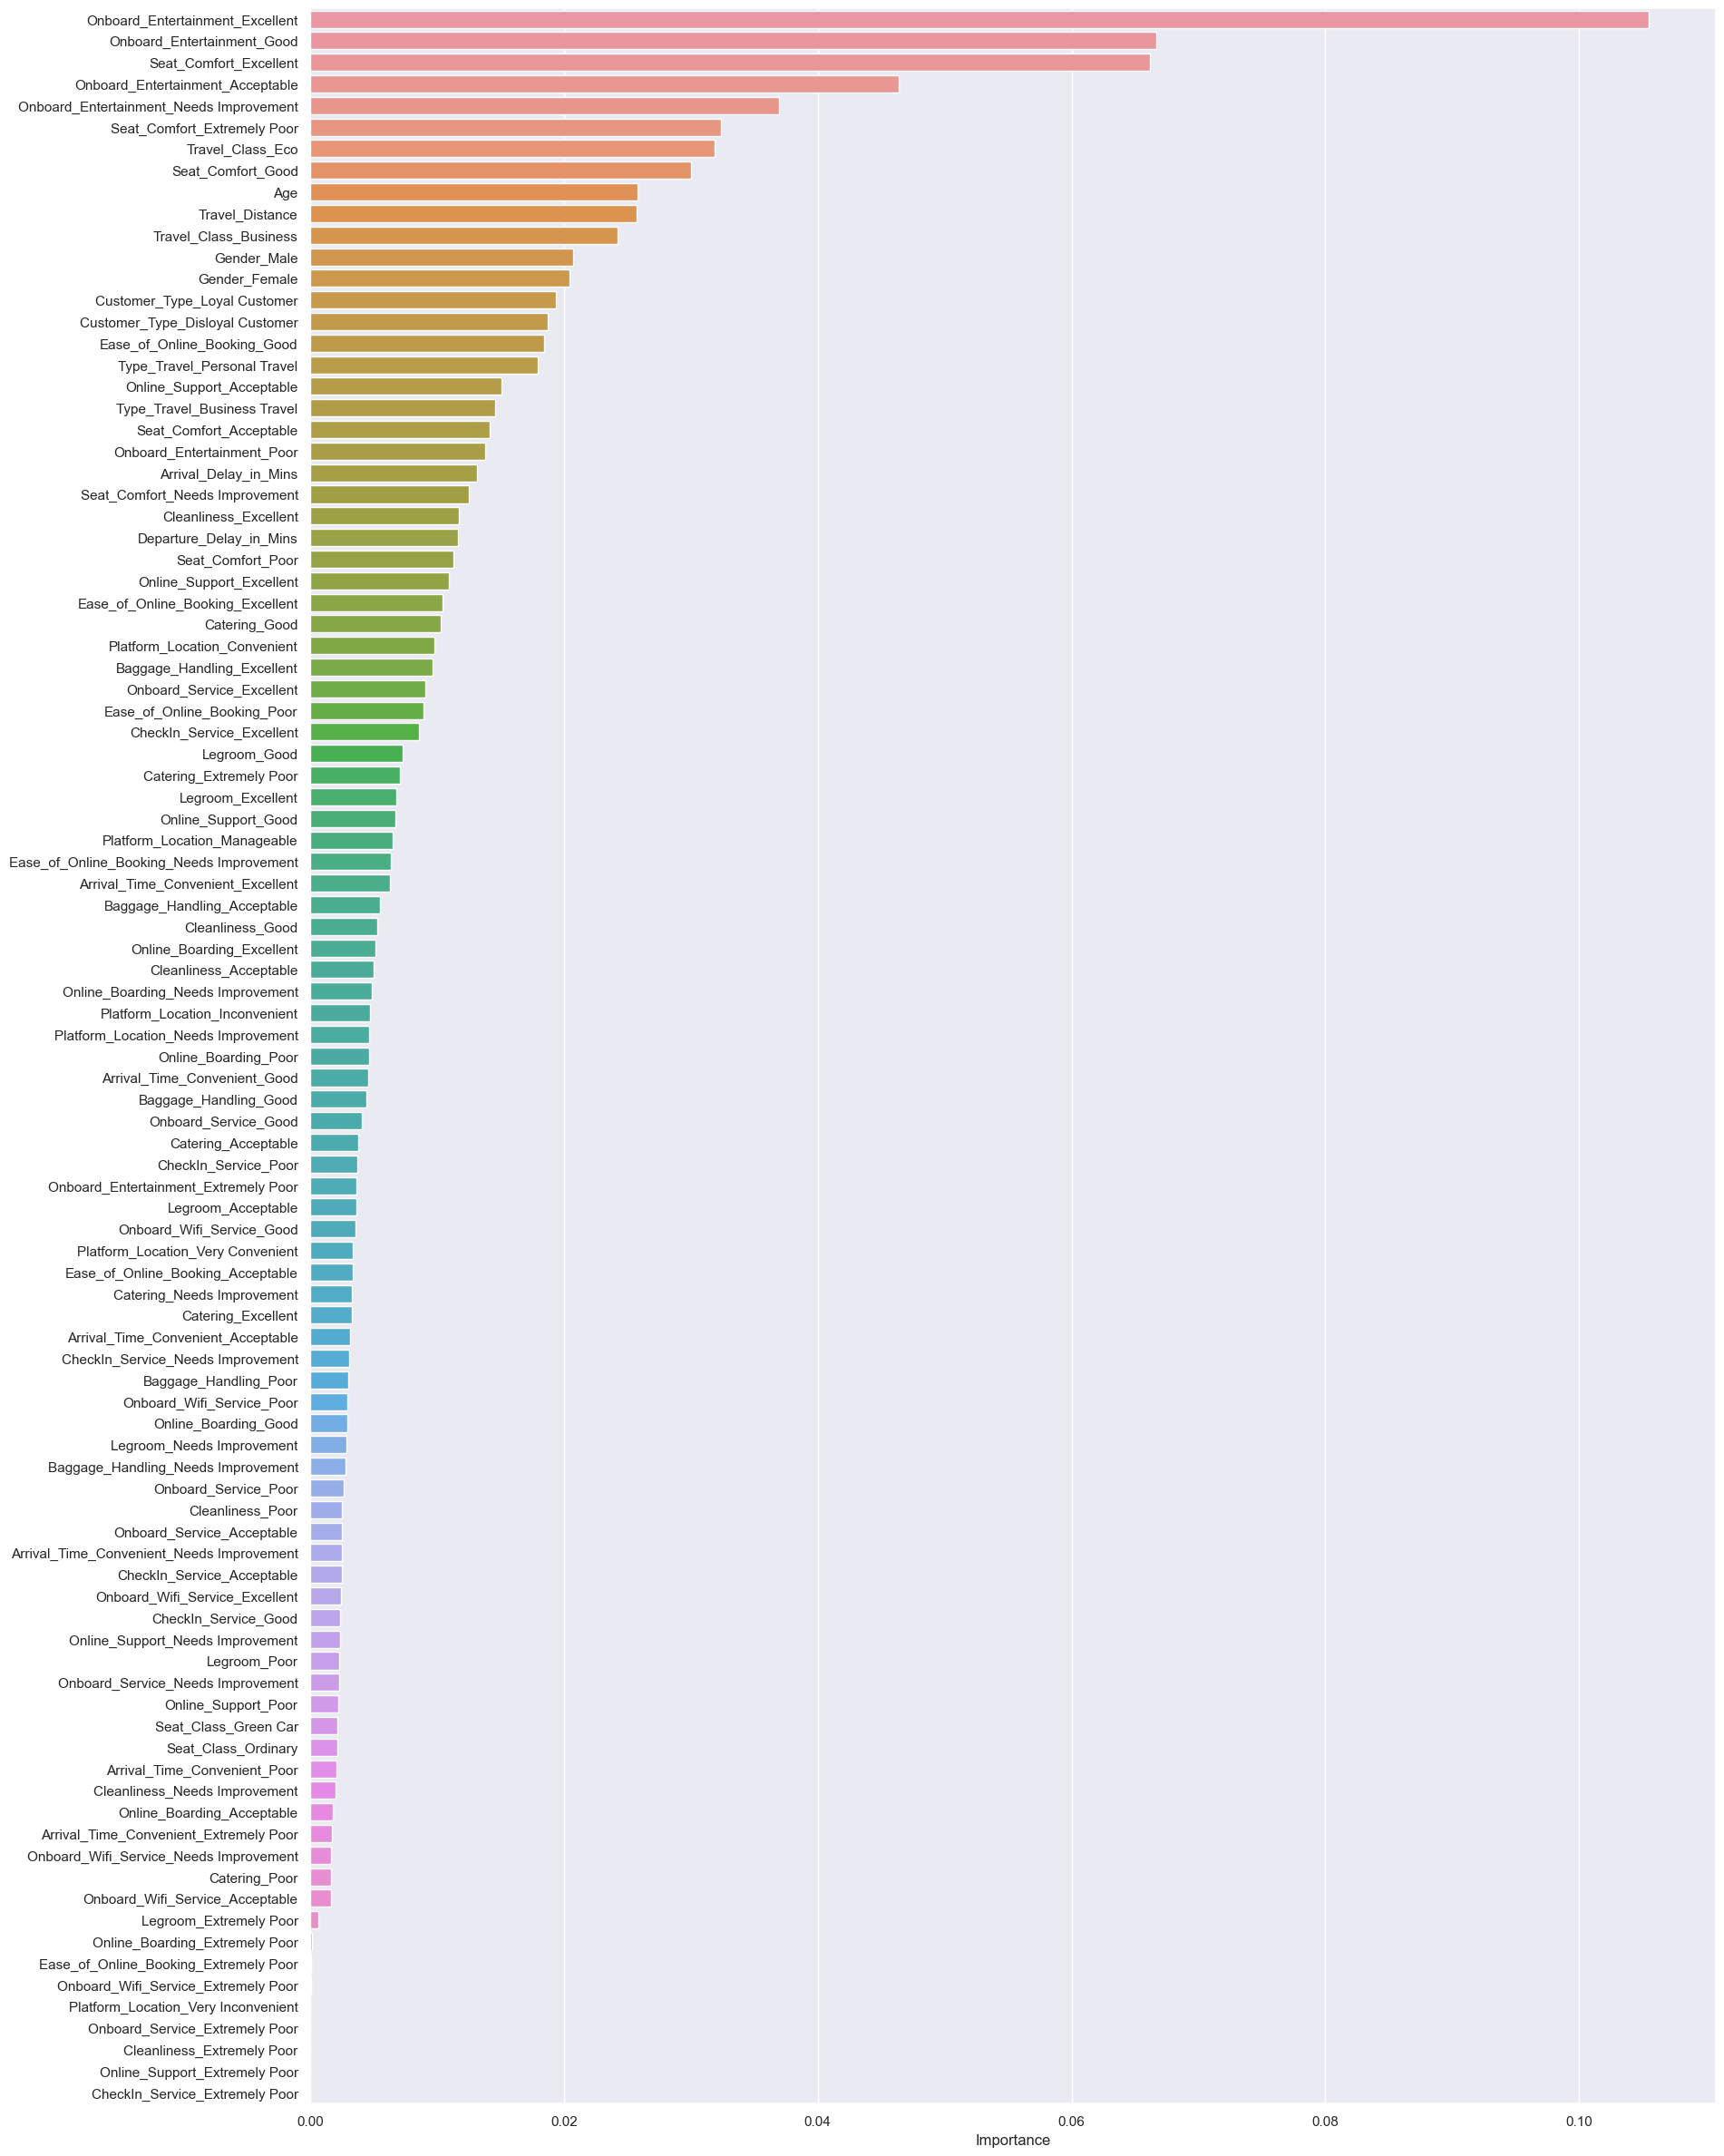

[CV] END bootstrap=True, max_features=0.2, n_estimators=1150; total time=13.7min
[CV] END bootstrap=False, max_features=0.6, n_estimators=500; total time=11.6min
[CV] END bootstrap=False, max_features=0.3, n_estimators=250; total time= 3.3min
[CV] END bootstrap=False, max_features=0.3, n_estimators=250; total time= 3.1min
[CV] END bootstrap=False, max_features=0.5, n_estimators=750; total time=14.7min
[CV] END .bootstrap=True, max_features=0.7, n_estimators=350; total time= 5.9min
[CV] END bootstrap=False, max_features=0.9, n_estimators=350; total time=11.6min
[CV] END bootstrap=False, max_features=0.9, n_estimators=350; total time=12.0min
[CV] END bootstrap=False, max_features=0.4, n_estimators=350; total time= 5.5min
[CV] END bootstrap=True, max_features=0.35, n_estimators=550; total time= 5.0min
[CV] END .bootstrap=True, max_features=0.2, n_estimators=700; total time= 4.2min
[CV] END bootstrap=True, max_features=0.25, n_estimators=650; total time= 4.6min
[CV] END .bootstrap=True, ma

[CV] END bootstrap=False, max_features=0.6, n_estimators=300; total time=13.9min
[CV] END bootstrap=False, max_features=0.6, n_estimators=500; total time=11.6min
[CV] END bootstrap=False, max_features=0.3, n_estimators=250; total time= 3.3min
[CV] END bootstrap=True, max_features=0.5, n_estimators=1150; total time=14.4min
[CV] END .bootstrap=True, max_features=0.7, n_estimators=350; total time= 6.0min
[CV] END bootstrap=False, max_features=0.4, n_estimators=150; total time= 2.4min
[CV] END bootstrap=False, max_features=0.6, n_estimators=1200; total time=27.8min
[CV] END bootstrap=False, max_features=0.425, n_estimators=300; total time= 5.1min
[CV] END bootstrap=True, max_features=0.35, n_estimators=550; total time= 5.1min
[CV] END bootstrap=False, max_features=0.35, n_estimators=250; total time= 3.5min
[CV] END .bootstrap=True, max_features=0.7, n_estimators=950; total time=16.1min
[CV] END .bootstrap=True, max_features=0.4, n_estimators=450; total time= 4.6min
[CV] END bootstrap=True,

[CV] END bootstrap=True, max_features=0.2, n_estimators=1150; total time=13.7min
[CV] END bootstrap=False, max_features=0.6, n_estimators=300; total time= 7.0min
[CV] END bootstrap=True, max_features=0.375, n_estimators=800; total time= 7.9min
[CV] END bootstrap=True, max_features=0.5, n_estimators=1150; total time=14.4min
[CV] END .bootstrap=True, max_features=0.7, n_estimators=350; total time= 5.9min
[CV] END bootstrap=False, max_features=0.4, n_estimators=150; total time= 2.5min
[CV] END bootstrap=False, max_features=0.6, n_estimators=1200; total time=27.7min
[CV] END bootstrap=False, max_features=0.425, n_estimators=300; total time= 5.0min
[CV] END bootstrap=True, max_features=0.35, n_estimators=550; total time= 5.1min
[CV] END bootstrap=False, max_features=0.35, n_estimators=250; total time= 3.6min
[CV] END bootstrap=True, max_features=0.25, n_estimators=650; total time= 4.6min
[CV] END bootstrap=False, max_features=0.8, n_estimators=300; total time= 9.1min
[CV] END .bootstrap=Tru

[CV] END bootstrap=True, max_features=0.2, n_estimators=1150; total time=13.7min
[CV] END bootstrap=False, max_features=0.6, n_estimators=500; total time=11.5min
[CV] END bootstrap=True, max_features=0.375, n_estimators=800; total time= 7.9min
[CV] END bootstrap=False, max_features=0.5, n_estimators=750; total time=14.5min
[CV] END bootstrap=False, max_features=0.4, n_estimators=150; total time= 2.4min
[CV] END bootstrap=False, max_features=0.4, n_estimators=150; total time= 2.4min
[CV] END bootstrap=False, max_features=0.6, n_estimators=1200; total time=27.3min
[CV] END bootstrap=False, max_features=0.425, n_estimators=300; total time= 5.1min
[CV] END .bootstrap=True, max_features=0.2, n_estimators=700; total time= 4.2min
[CV] END bootstrap=False, max_features=0.35, n_estimators=250; total time= 3.5min
[CV] END bootstrap=True, max_features=0.25, n_estimators=650; total time= 4.6min
[CV] END bootstrap=False, max_features=0.8, n_estimators=300; total time= 9.2min
[CV] END bootstrap=Fals

In [14]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (20, 30))

sns.barplot(importance_df.Importance, importance_df.index)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89     34229
           1       0.91      0.91      0.91     41274

    accuracy                           0.90     75503
   macro avg       0.90      0.90      0.90     75503
weighted avg       0.90      0.90      0.90     75503

Accuracy:  0.9035932347059057


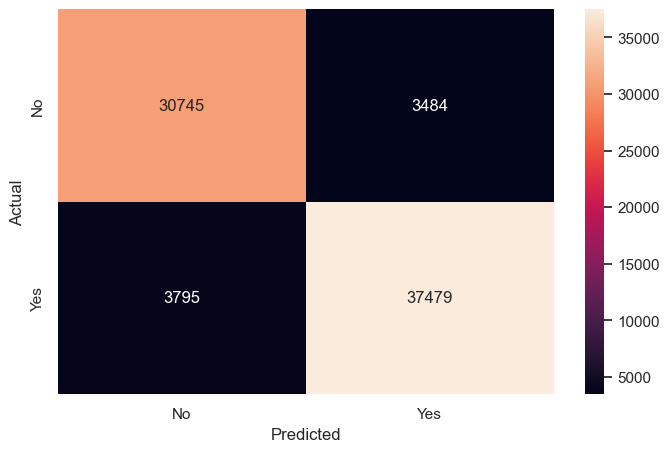

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      8557
           1       0.91      0.91      0.91     10319

    accuracy                           0.90     18876
   macro avg       0.90      0.90      0.90     18876
weighted avg       0.90      0.90      0.90     18876

Accuracy:  0.896959101504556


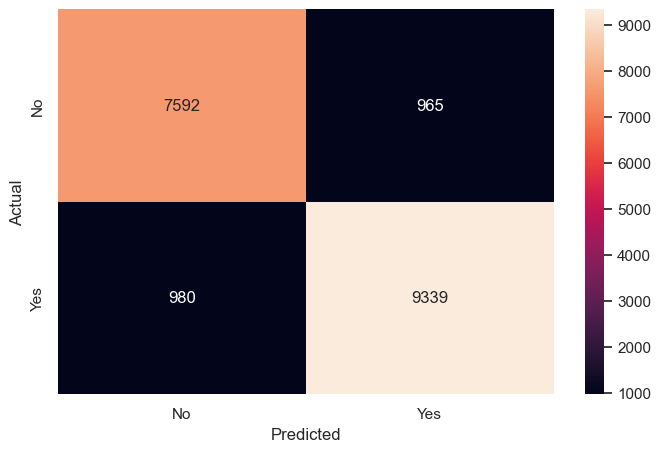

In [21]:
# just begun: Can boosted trees perform better than Random Forests? 
# Simple application yields poors result... no overfitting as compared to Random Forests, but poor result on training data

clf = AdaBoostClassifier(n_estimators=10000, algorithm = 'SAMME.R', random_state=1)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
metrics_score(y_train, y_pred_train)
y_pred_test = clf.predict(X_test)
clf.score(X_test, y_test)
metrics_score(y_test, y_pred_test)